In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import dash
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
raw_data = pd.read_csv('GlobalTemperatures.csv')

In [63]:
def fetch_year(x):
    return x.split('-')[0]

In [64]:
raw_data['years'] = raw_data['dt'].apply(fetch_year)

In [65]:
raw_data.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years'],
      dtype='object')

In [5]:
data = raw_data.groupby('years').agg({raw_data.columns[1]:'mean',raw_data.columns[2]:'mean'}).reset_index()

In [26]:
data.head(10)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
5,1755,8.355583,3.850333
6,1756,8.849583,3.262333
7,1757,9.022000,4.026000
8,1758,6.743583,3.362917
9,1759,7.985083,3.678917


In [6]:
data['TopUncertainTemp'] = data[data.columns[1]] + data[data.columns[2]]
data['BottomUncertainTemp'] = data[data.columns[1]] - data[data.columns[2]]

In [30]:
data.head(10)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,TopUncertainTemp,BottomUncertainTemp
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
5,1755,8.355583,3.850333,12.205917,4.505250
6,1756,8.849583,3.262333,12.111917,5.587250
7,1757,9.022000,4.026000,13.048000,4.996000
8,1758,6.743583,3.362917,10.106500,3.380667
9,1759,7.985083,3.678917,11.664000,4.306167


In [7]:
import matplotlib.pyplot as plt

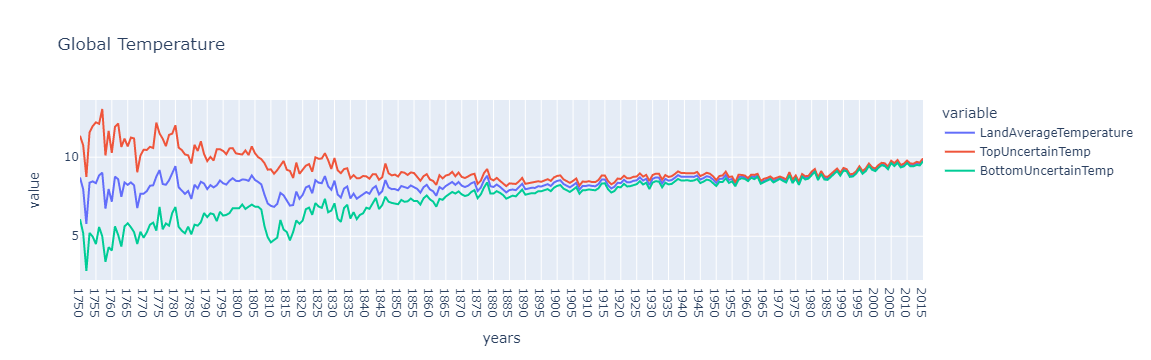

In [93]:
fig2 = px.line(data, x='years', y=['LandAverageTemperature','TopUncertainTemp','BottomUncertainTemp'], title='Global Temperature')
fig2.show()

In [66]:
raw_data['dt']=pd.to_datetime(raw_data['dt'])

In [67]:
raw_data['month']=raw_data['dt'].dt.month

In [73]:
def get_season(m):
    if m>=3 and m<=5:
        return 'spring'
    elif m>=5 and m<=8:
        return 'summer'
    elif m>=9 and m<=11:
        return 'autumn'
    else:
        return 'winter'

In [74]:
raw_data['season']=raw_data['month'].apply(get_season)

In [77]:
yearsdf = raw_data['years'].unique()

In [76]:
summert=[]
wintert=[]
autumnt=[]
springt=[]


In [78]:
for year in yearsdf:
    current_df = raw_data[raw_data['years']==year]
    springt.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
    summert.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
    autumnt.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
    wintert.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [79]:
seasonat = pd.DataFrame()

In [80]:
seasonat['years']=yearsdf
seasonat['spring']=springt
seasonat['winter']=wintert
seasonat['autumn']=autumnt
seasonat['summer']=summert

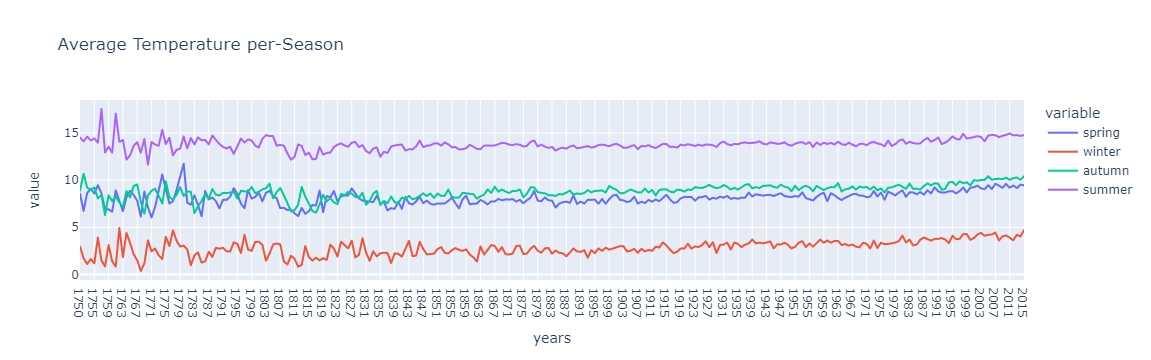

In [92]:
fig4 = px.line(seasonat,x ='years',y =['spring','winter','autumn','summer'],title='Average Temperature per-Season')
fig4.show()

In [46]:
raw_data.loc[raw_data['season'] == 'summer']

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season


In [75]:
unique, counts = np.unique(raw_data['season'], return_counts = True)
#countspercent = counts/np.sum(counts)
dict(zip(unique,counts))

{'autumn': 798, 'spring': 798, 'summer': 798, 'winter': 798}

In [71]:
raw_data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11
